In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [3]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [4]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//figures//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [5]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [6]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [7]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [8]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Shuffling training testing

In [9]:
dataset=torch.cat((train_dataset.data,test_dataset.data),0)
target=torch.cat((train_target.data,test_target.data),0)

In [10]:
permutations=torch.randperm(dataset.shape[0])

In [11]:
dataset=dataset[permutations]
target=target[permutations]

In [12]:
train_dataset=Variable(dataset[:316])
train_target=Variable(target[:316])
test_dataset=Variable(dataset[316:])
test_target=Variable(target[316:])

# Normalization

In [13]:
train_dataset.shape

torch.Size([316, 28, 50])

In [14]:
test_dataset.shape

torch.Size([100, 28, 50])

In [15]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [16]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

0


/home/stefano/anaconda3/lib/python3.6/site-packages/torch/cuda/__init__.py:97: UserWarning: 
    Found GPU0 GeForce GTX 960M which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))
  0%|          | 0/300 [00:00<?, ?it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.81it/s]


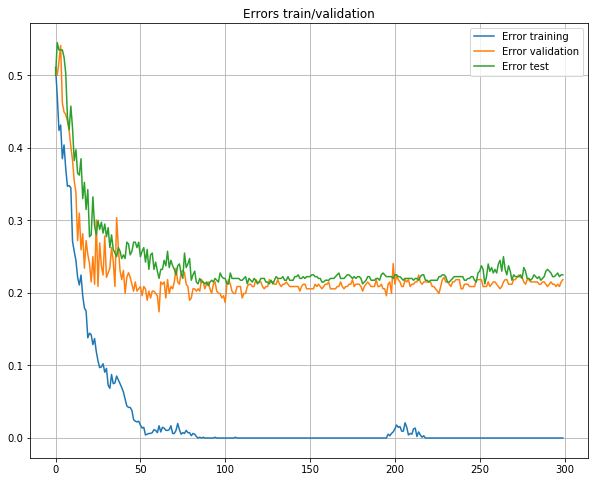

Performance train: 0.0
Performance validation: 0.213544303797
Performance test: 0.224966666667
1


  5%|▌         | 15/300 [00:00<00:01, 149.17it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.61it/s]


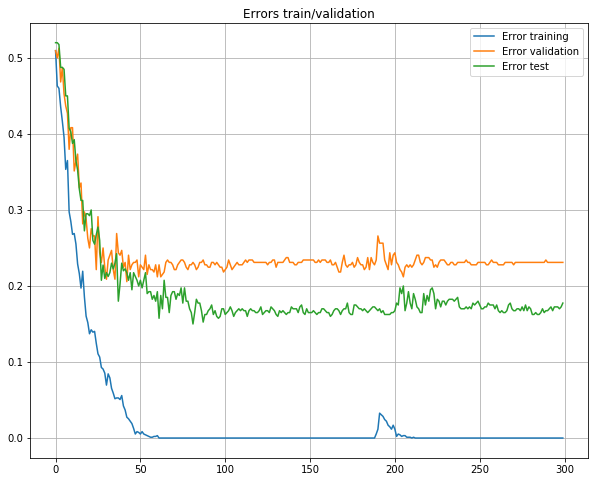

Performance train: 0.0
Performance validation: 0.230548523207
Performance test: 0.1722
2


  5%|▌         | 15/300 [00:00<00:02, 141.89it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.37it/s]


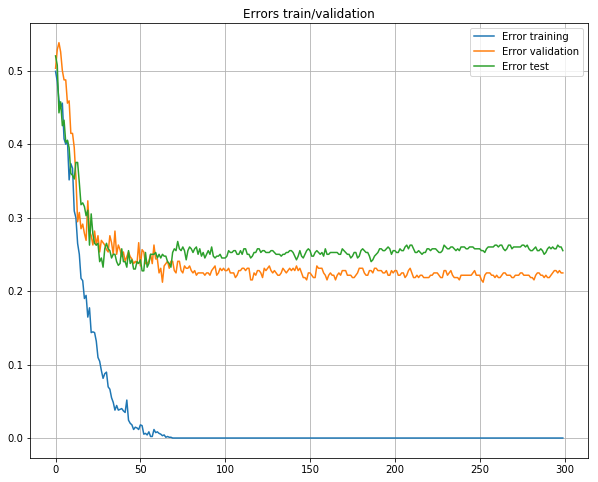

Performance train: 0.0
Performance validation: 0.221772151899
Performance test: 0.258266666667
3


  5%|▌         | 16/300 [00:00<00:01, 152.95it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.57it/s]


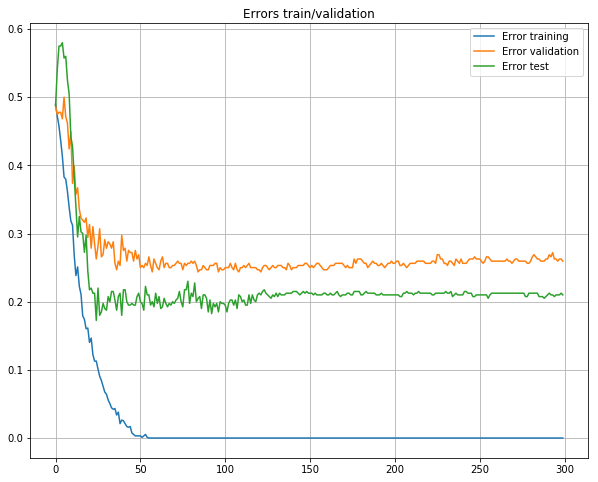

Performance train: 0.0
Performance validation: 0.260970464135
Performance test: 0.2111
4


  5%|▌         | 16/300 [00:00<00:01, 153.29it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 86.29it/s] 


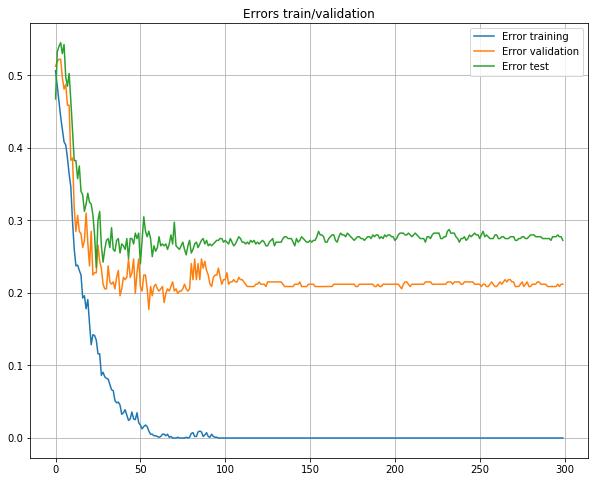

Performance train: 0.0
Performance validation: 0.212489451477
Performance test: 0.2774
5


  5%|▌         | 15/300 [00:00<00:01, 142.86it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 91.43it/s] 


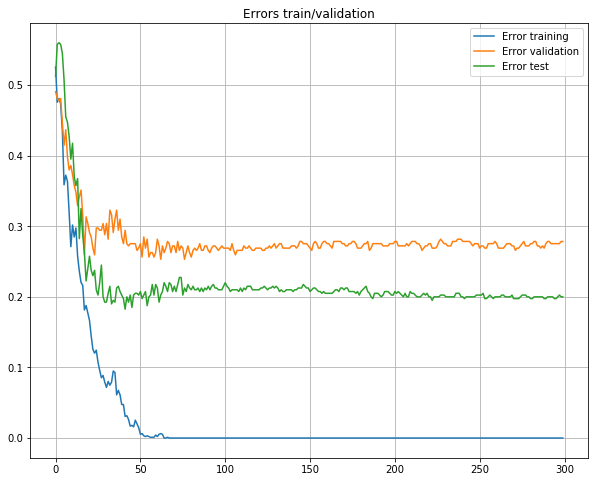

Performance train: 0.0
Performance validation: 0.274641350211
Performance test: 0.2003
6


  5%|▍         | 14/300 [00:00<00:02, 136.10it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 101.87it/s]


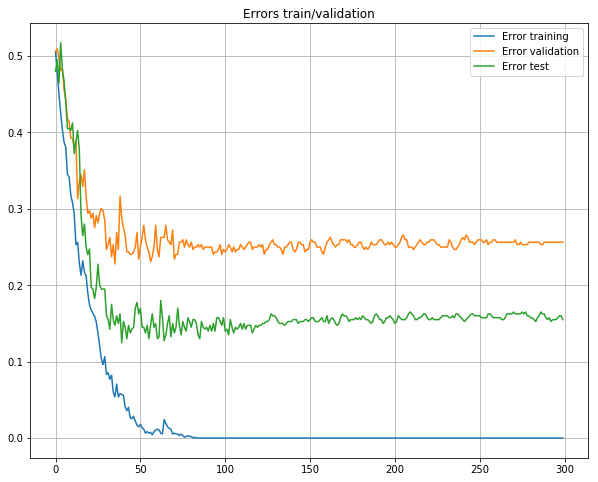

Performance train: 0.0
Performance validation: 0.255654008439
Performance test: 0.159
7


  4%|▍         | 13/300 [00:00<00:02, 129.84it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 119.37it/s]


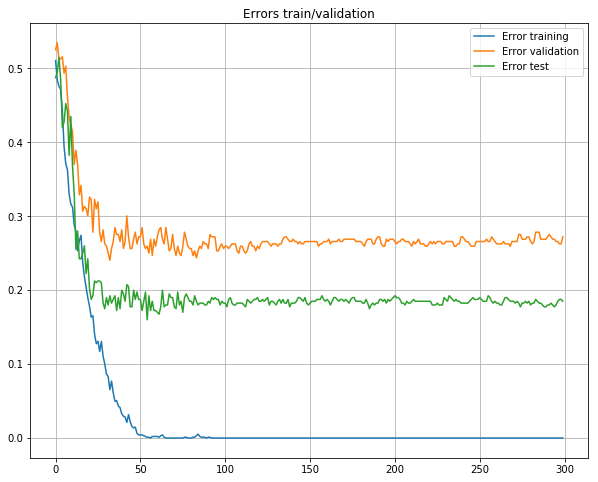

Performance train: 0.0
Performance validation: 0.266751054852
Performance test: 0.1843
8


  5%|▌         | 16/300 [00:00<00:01, 158.03it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 93.52it/s] 


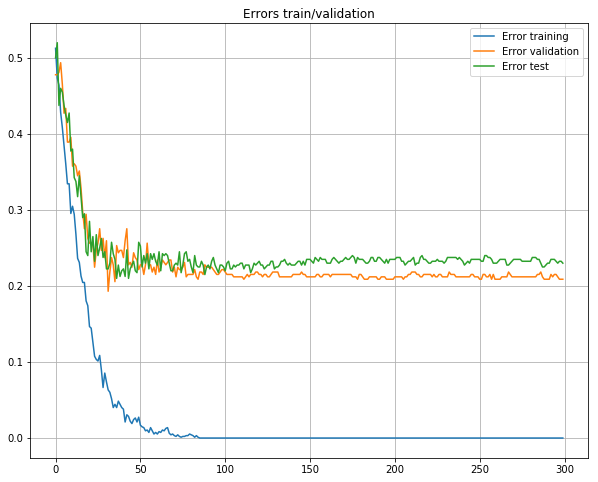

Performance train: 0.0
Performance validation: 0.212405063291
Performance test: 0.233433333333
9


  4%|▎         | 11/300 [00:00<00:02, 101.73it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 114.08it/s]


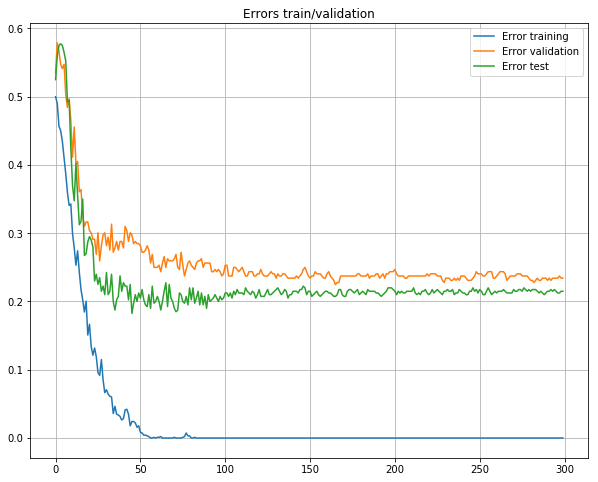

Performance train: 0.0
Performance validation: 0.235780590717
Performance test: 0.214666666667
10


  5%|▌         | 16/300 [00:00<00:01, 154.60it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.12it/s]


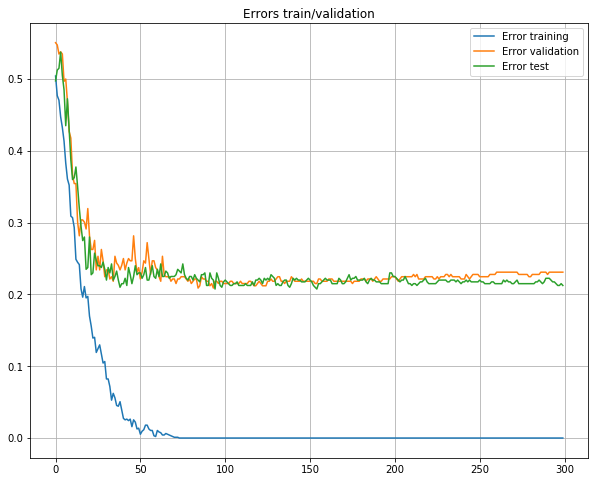

Performance train: 0.0
Performance validation: 0.227679324895
Performance test: 0.217233333333
11


  3%|▎         | 9/300 [00:00<00:03, 87.70it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.65it/s]


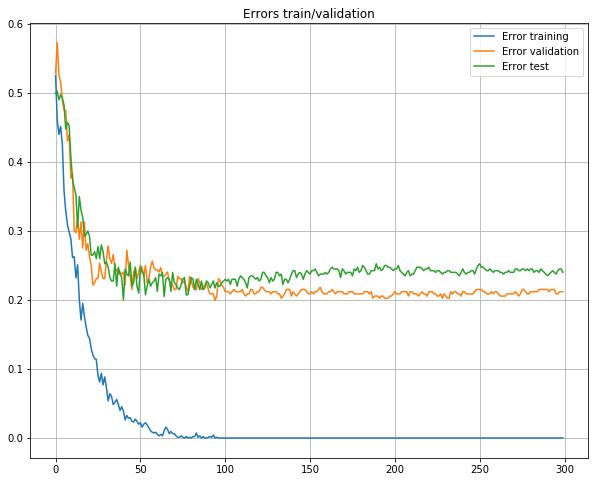

Performance train: 0.0
Performance validation: 0.210421940928
Performance test: 0.241766666667
12


  5%|▌         | 16/300 [00:00<00:01, 153.71it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.77it/s]


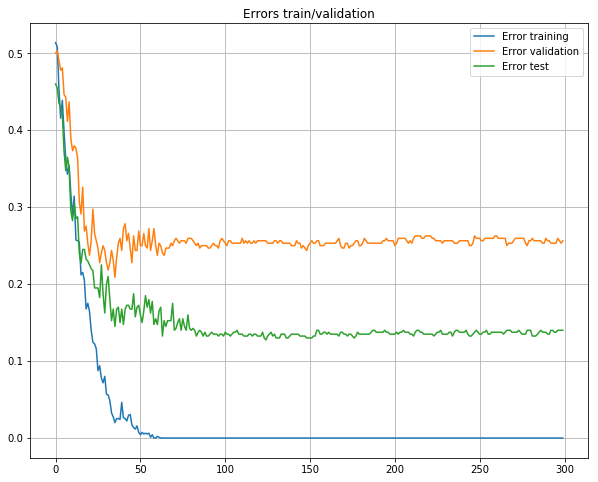

Performance train: 0.0
Performance validation: 0.256540084388
Performance test: 0.1372
13


  5%|▍         | 14/300 [00:00<00:02, 139.95it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.46it/s]


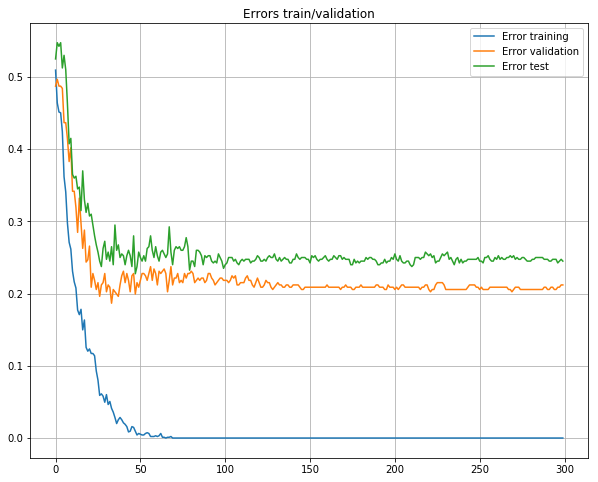

Performance train: 0.0
Performance validation: 0.20776371308
Performance test: 0.2479
14


  3%|▎         | 10/300 [00:00<00:03, 96.02it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:04<00:00, 73.81it/s]


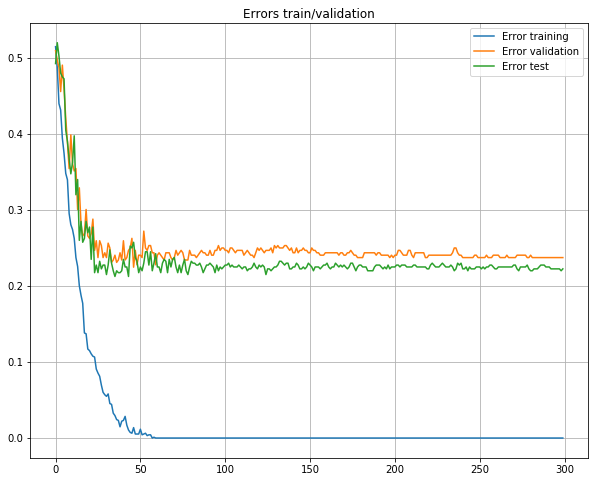

Performance train: 0.0
Performance validation: 0.238945147679
Performance test: 0.224466666667
15


  3%|▎         | 10/300 [00:00<00:03, 91.20it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 109.48it/s]


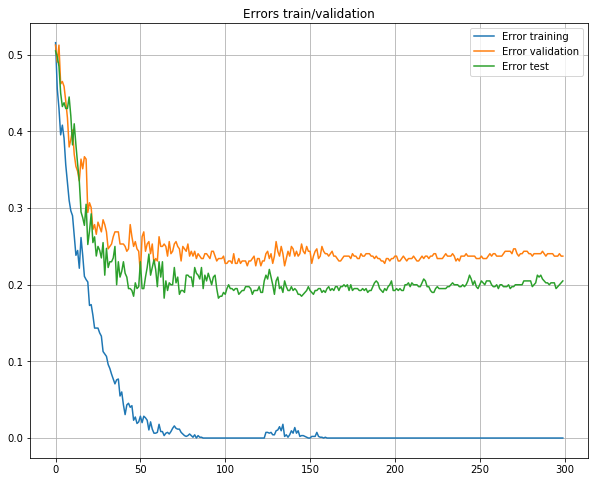

Performance train: 0.0
Performance validation: 0.23864978903
Performance test: 0.200866666667
16


  5%|▌         | 15/300 [00:00<00:01, 147.33it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 80.71it/s]


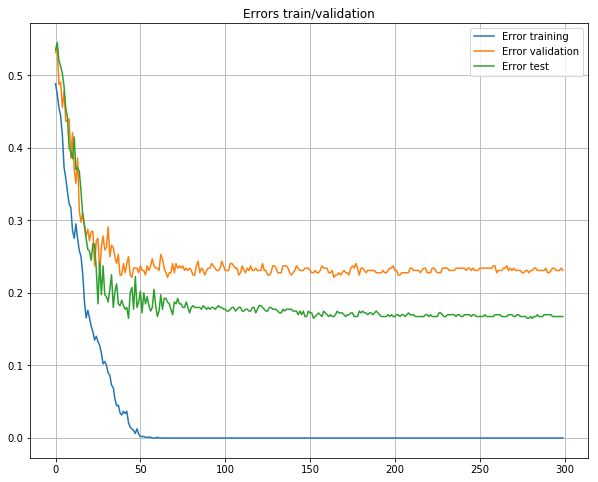

Performance train: 0.0
Performance validation: 0.232194092827
Performance test: 0.168533333333
17


  4%|▍         | 13/300 [00:00<00:02, 126.29it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 105.04it/s]


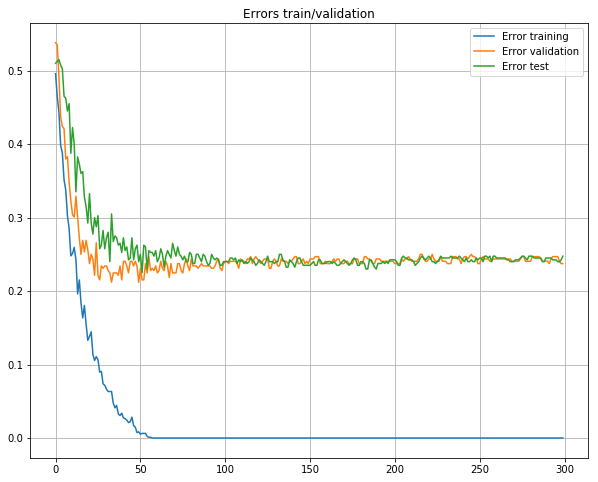

Performance train: 0.0
Performance validation: 0.242995780591
Performance test: 0.244
18


  3%|▎         | 10/300 [00:00<00:03, 90.18it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 105.81it/s]


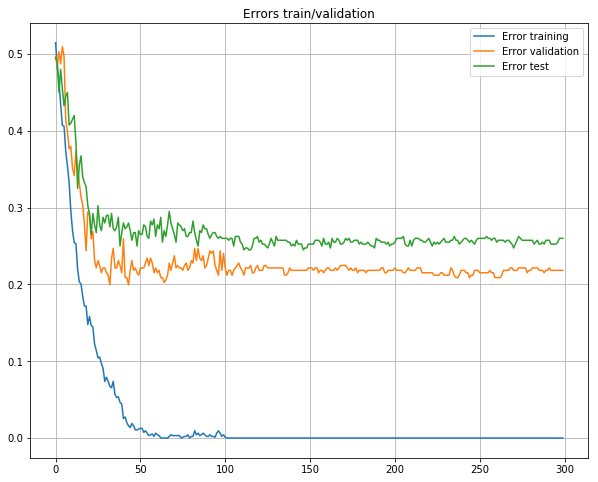

Performance train: 0.0
Performance validation: 0.216497890295
Performance test: 0.256766666667
19


  3%|▎         | 10/300 [00:00<00:02, 96.70it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.36it/s]


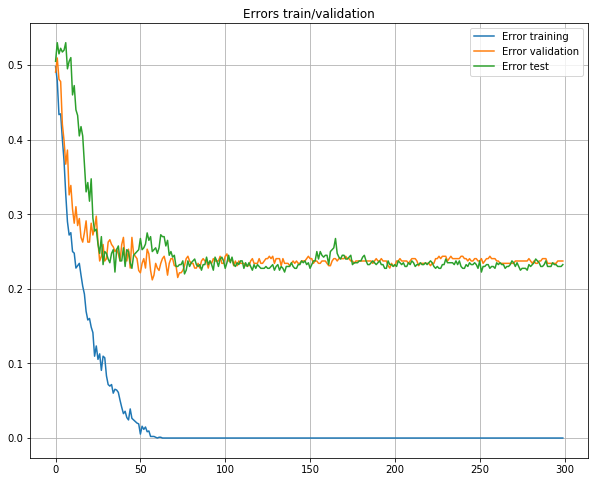

Performance train: 0.0
Performance validation: 0.238185654008
Performance test: 0.2318
20


  5%|▌         | 16/300 [00:00<00:01, 155.54it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.42it/s]


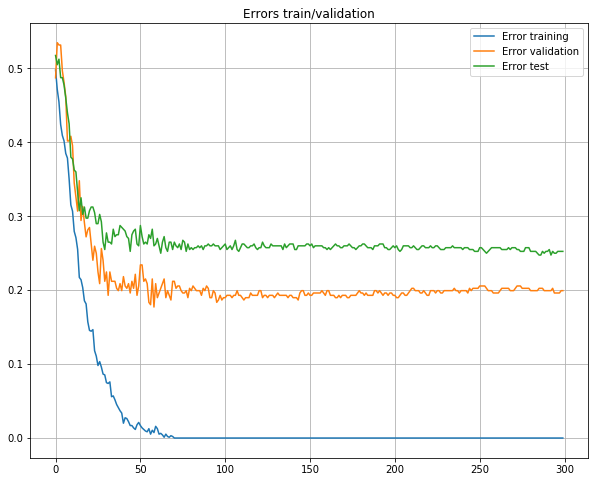

Performance train: 0.0
Performance validation: 0.200379746835
Performance test: 0.254766666667
21


  5%|▌         | 16/300 [00:00<00:01, 157.72it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 108.91it/s]


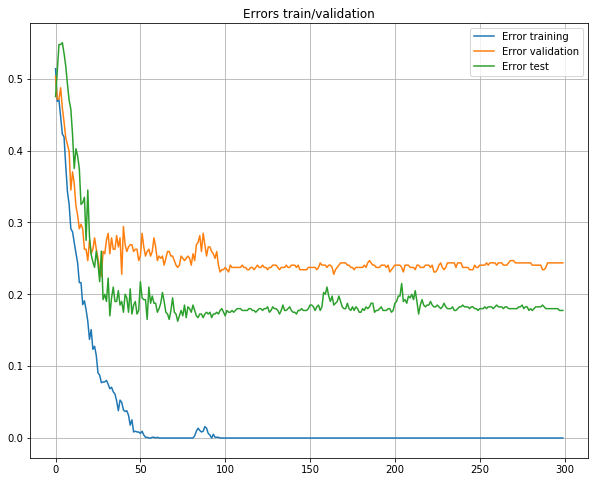

Performance train: 0.0
Performance validation: 0.24135021097
Performance test: 0.181166666667
22


  5%|▌         | 15/300 [00:00<00:01, 147.66it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.44it/s]


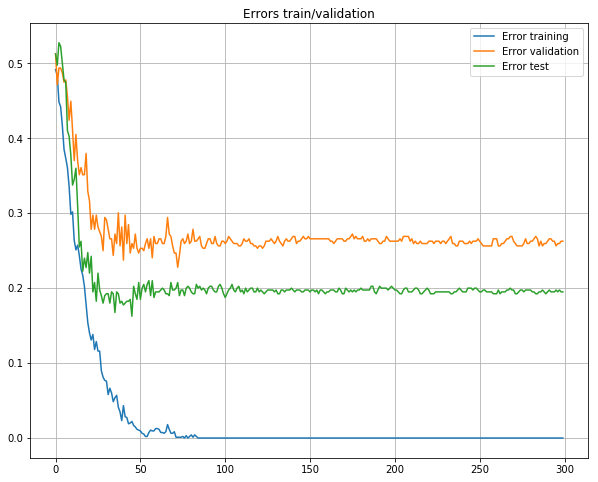

Performance train: 0.0
Performance validation: 0.261265822785
Performance test: 0.1958
23


  5%|▍         | 14/300 [00:00<00:02, 136.22it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 109.35it/s]


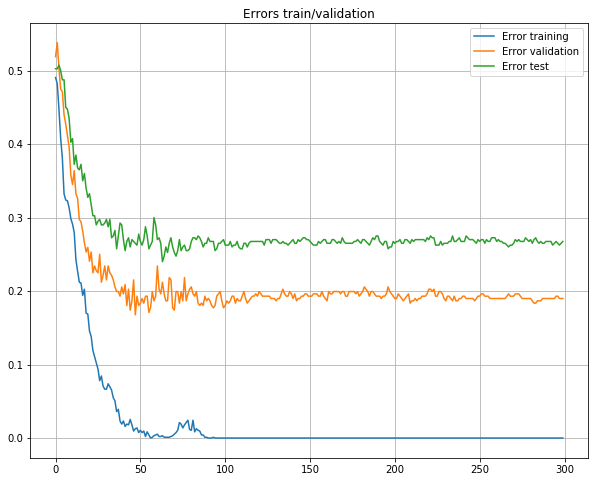

Performance train: 0.0
Performance validation: 0.190928270042
Performance test: 0.2675
24


  3%|▎         | 9/300 [00:00<00:03, 89.26it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 115.36it/s]


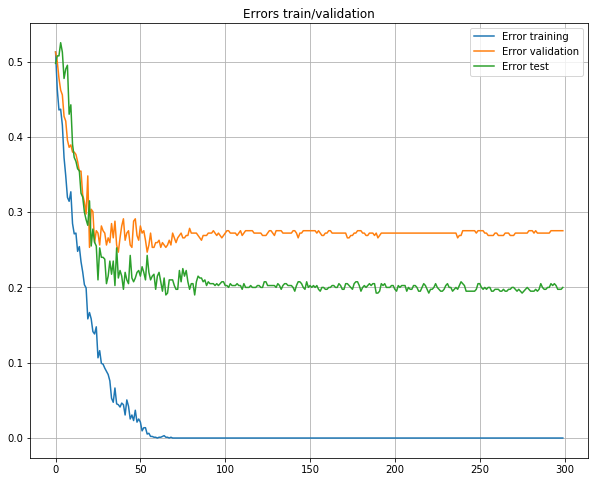

Performance train: 0.0
Performance validation: 0.27253164557
Performance test: 0.198366666667
25


  5%|▍         | 14/300 [00:00<00:02, 138.81it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.25it/s]


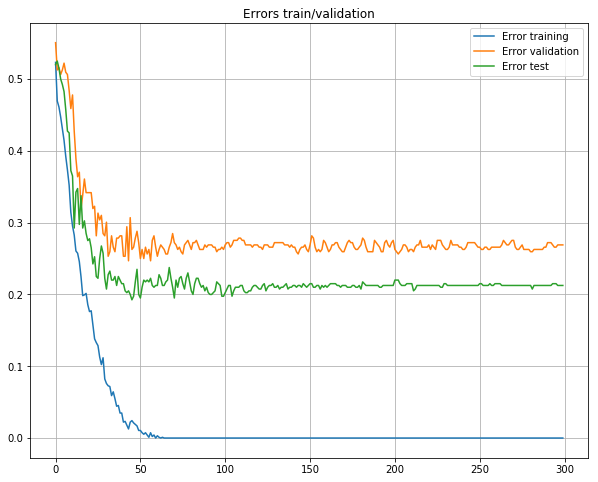

Performance train: 0.0
Performance validation: 0.267172995781
Performance test: 0.212766666667
26


  4%|▎         | 11/300 [00:00<00:02, 103.91it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 77.51it/s]


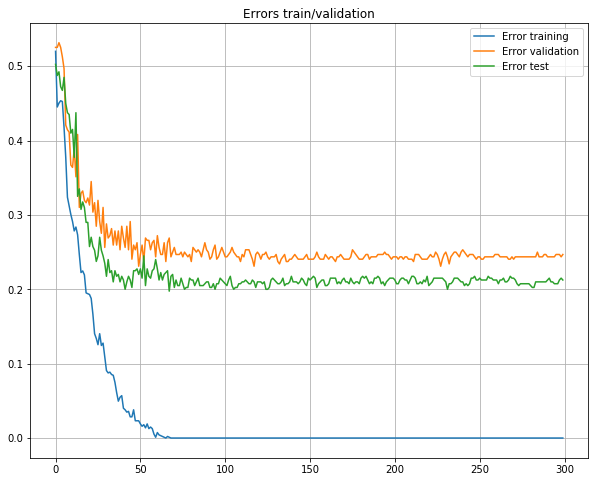

Performance train: 0.0
Performance validation: 0.244388185654
Performance test: 0.210933333333
27


  5%|▌         | 15/300 [00:00<00:02, 140.82it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 95.19it/s] 


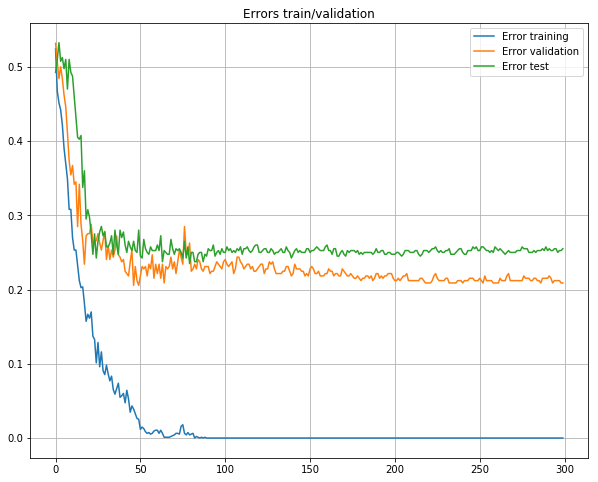

Performance train: 0.0
Performance validation: 0.212616033755
Performance test: 0.252466666667
28


  5%|▍         | 14/300 [00:00<00:02, 136.61it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 112.63it/s]


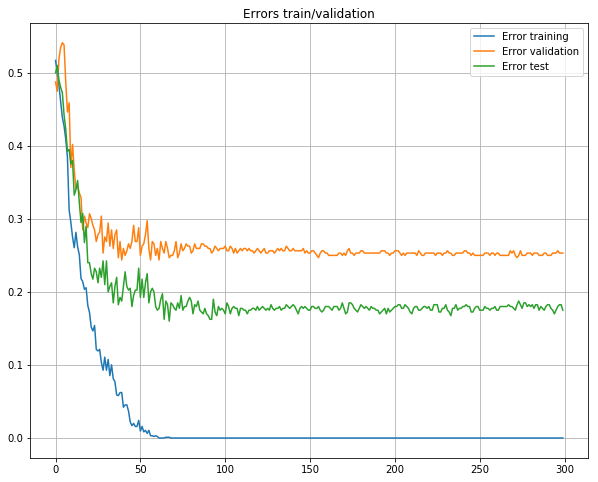

Performance train: 0.0
Performance validation: 0.252109704641
Performance test: 0.178466666667
29


  5%|▌         | 15/300 [00:00<00:01, 148.60it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.03it/s]


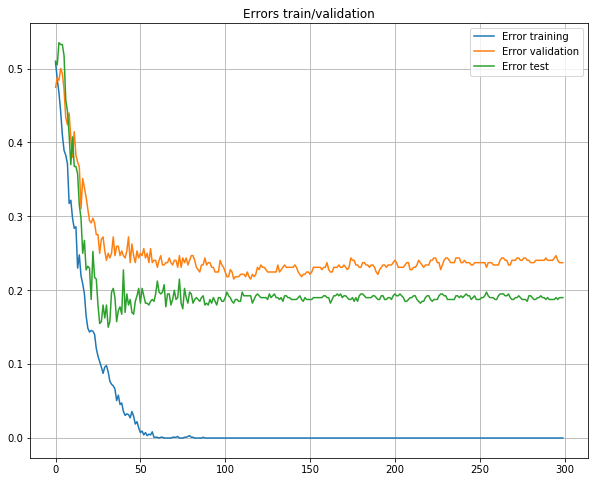

Performance train: 0.0
Performance validation: 0.238987341772
Performance test: 0.1903
30


  5%|▌         | 15/300 [00:00<00:02, 141.75it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 107.96it/s]


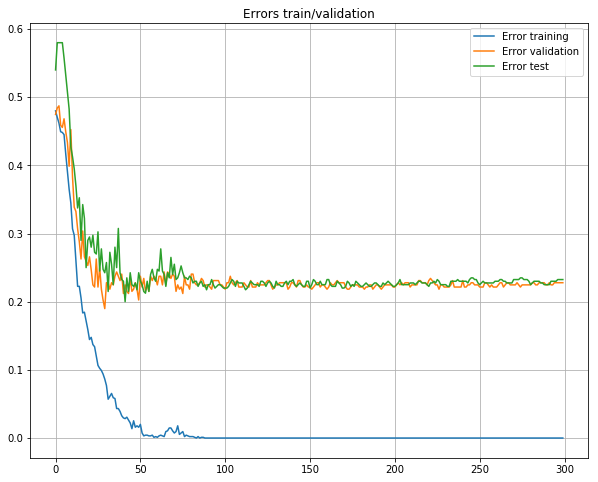

Performance train: 0.0
Performance validation: 0.224852320675
Performance test: 0.229466666667
31


  5%|▌         | 15/300 [00:00<00:01, 143.73it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 106.07it/s]


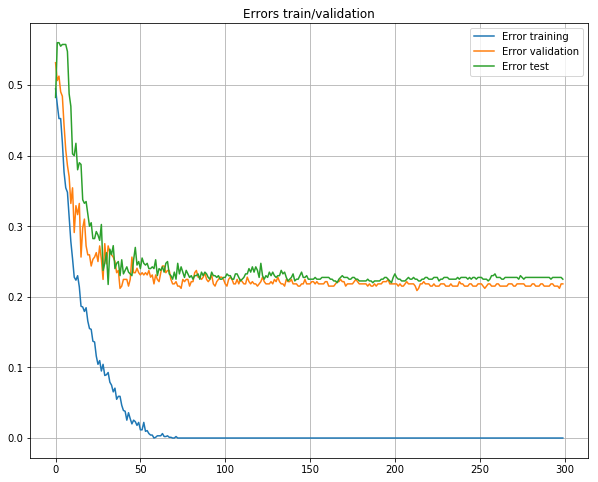

Performance train: 0.0
Performance validation: 0.216497890295
Performance test: 0.226833333333
32


  5%|▌         | 15/300 [00:00<00:01, 142.77it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.45it/s]


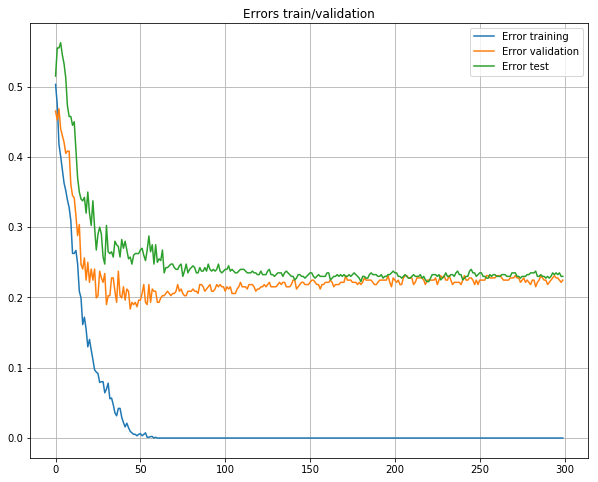

Performance train: 0.0
Performance validation: 0.225316455696
Performance test: 0.231633333333
33


  5%|▌         | 15/300 [00:00<00:02, 140.79it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 108.69it/s]


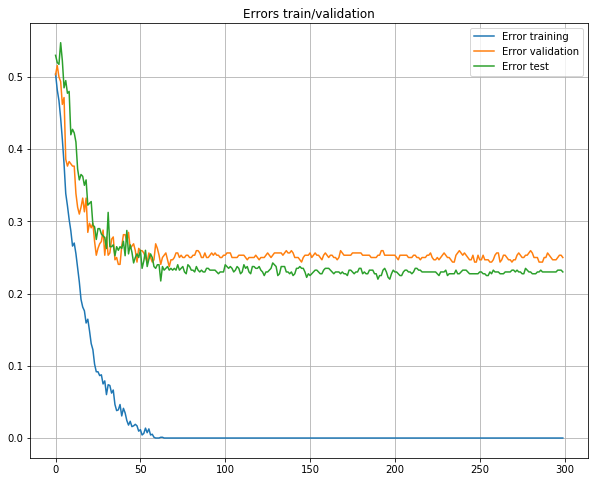

Performance train: 0.0
Performance validation: 0.250168776371
Performance test: 0.229466666667
34


  5%|▍         | 14/300 [00:00<00:02, 136.98it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 108.19it/s]


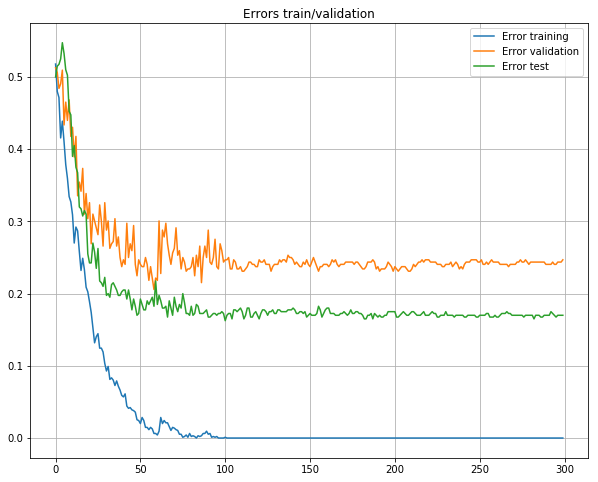

Performance train: 0.0
Performance validation: 0.242194092827
Performance test: 0.169866666667
35


  5%|▌         | 16/300 [00:00<00:01, 153.31it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.47it/s]


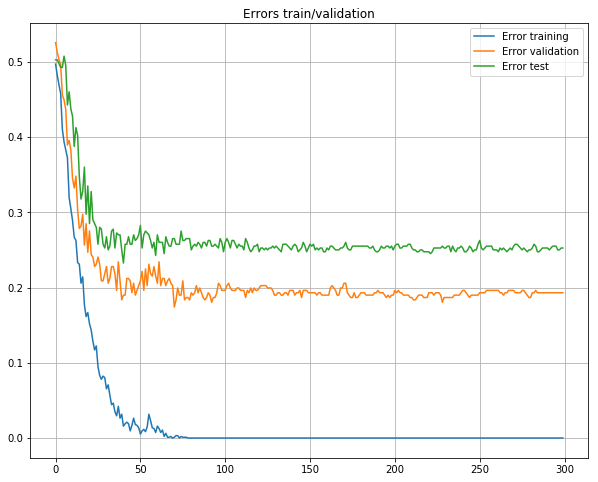

Performance train: 0.0
Performance validation: 0.192278481013
Performance test: 0.2521
36


  5%|▌         | 16/300 [00:00<00:01, 153.49it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:04<00:00, 70.47it/s]


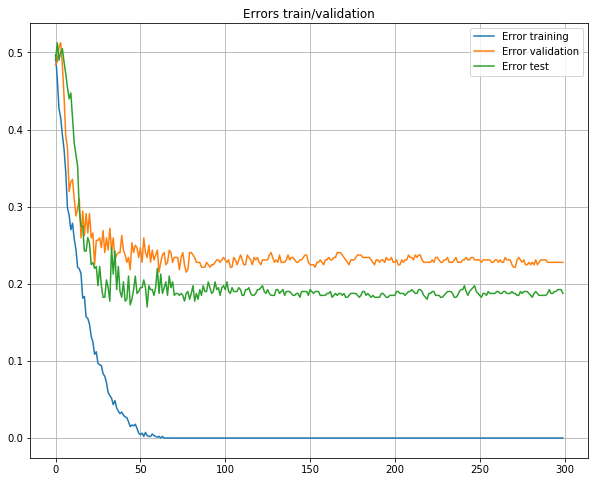

Performance train: 0.0
Performance validation: 0.2294092827
Performance test: 0.1881
37


  4%|▎         | 11/300 [00:00<00:02, 100.88it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.61it/s]


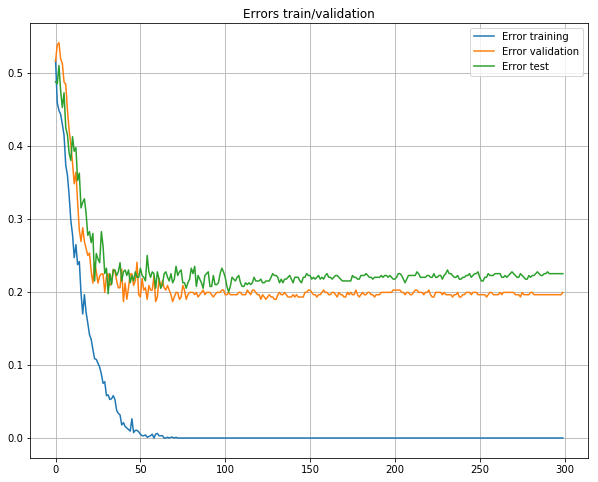

Performance train: 0.0
Performance validation: 0.197046413502
Performance test: 0.2227
38


  5%|▌         | 16/300 [00:00<00:01, 151.43it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 111.48it/s]


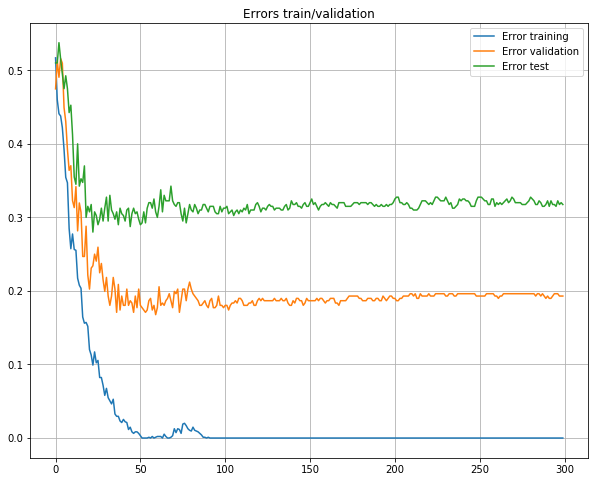

Performance train: 0.0
Performance validation: 0.194936708861
Performance test: 0.320633333333
39


  5%|▌         | 16/300 [00:00<00:01, 152.87it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:03<00:00, 75.75it/s]


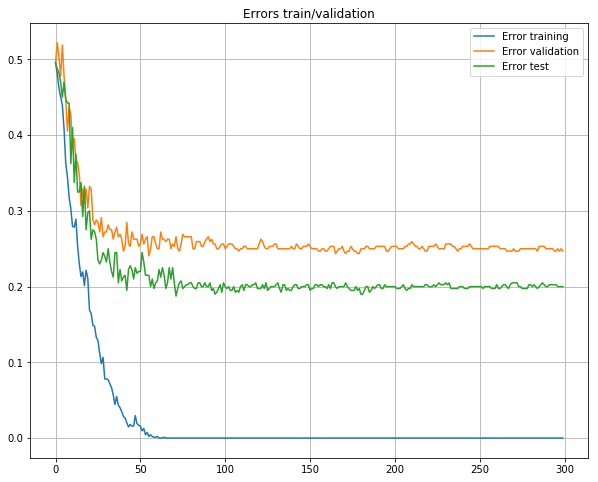

Performance train: 0.0
Performance validation: 0.250632911392
Performance test: 0.2005
40


  5%|▍         | 14/300 [00:00<00:02, 130.63it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.66it/s]


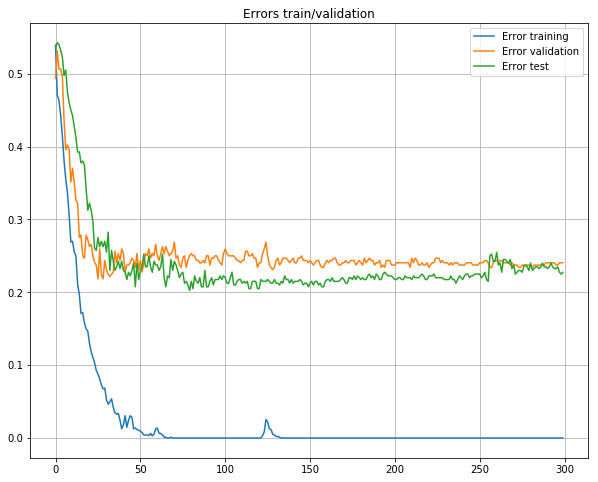

Performance train: 0.0
Performance validation: 0.239324894515
Performance test: 0.229633333333
41


  5%|▌         | 15/300 [00:00<00:01, 143.67it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 82.86it/s] 


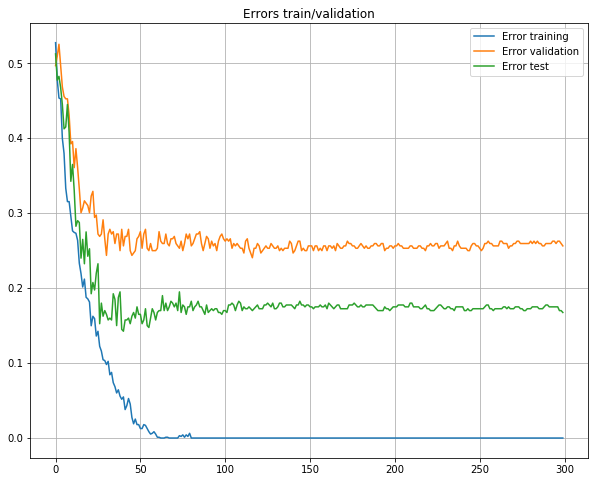

Performance train: 0.0
Performance validation: 0.257974683544
Performance test: 0.1734
42


  3%|▎         | 10/300 [00:00<00:02, 97.88it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 104.50it/s]


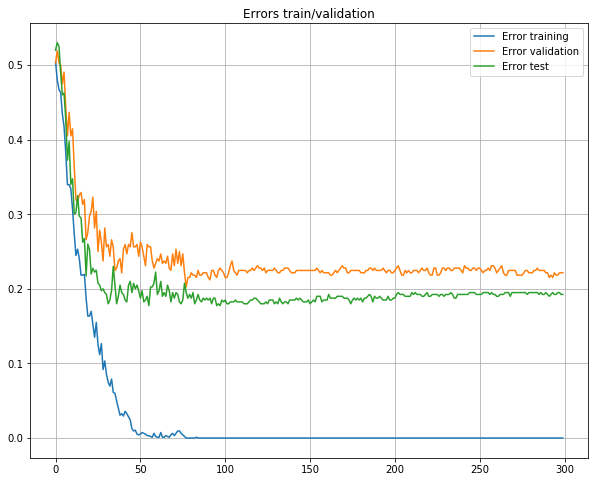

Performance train: 0.0
Performance validation: 0.223966244726
Performance test: 0.193266666667
43


  3%|▎         | 10/300 [00:00<00:02, 99.29it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 116.71it/s]


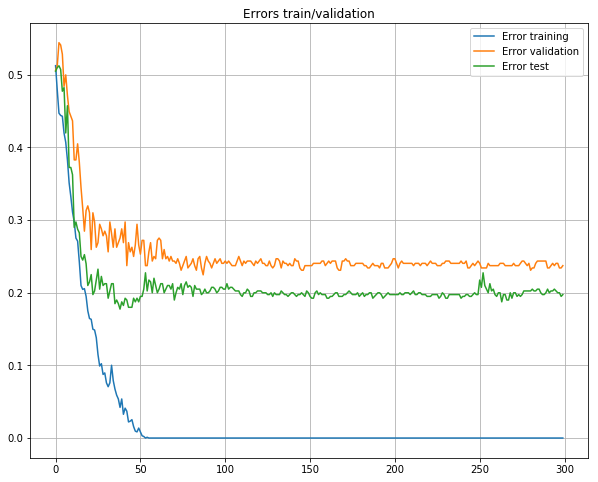

Performance train: 0.0
Performance validation: 0.238987341772
Performance test: 0.199566666667
44


  5%|▌         | 15/300 [00:00<00:01, 146.53it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 107.06it/s]


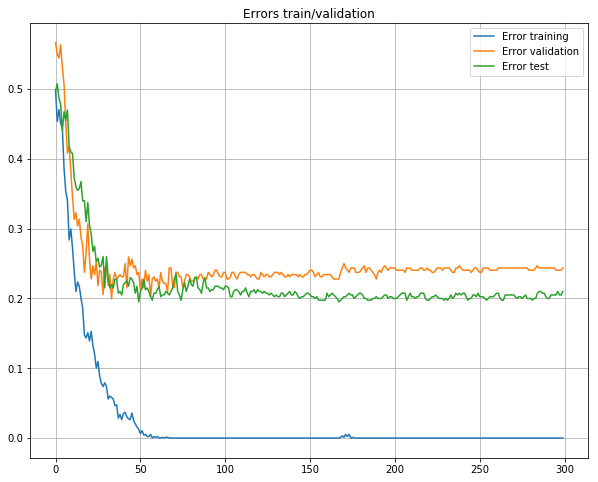

Performance train: 0.0
Performance validation: 0.242405063291
Performance test: 0.203066666667
45


  5%|▍         | 14/300 [00:00<00:02, 139.06it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 114.25it/s]


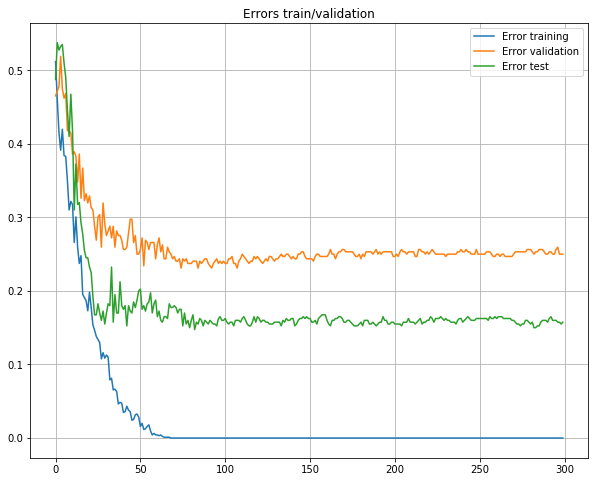

Performance train: 0.0
Performance validation: 0.251518987342
Performance test: 0.1599
46


  5%|▌         | 16/300 [00:00<00:01, 153.50it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 107.39it/s]


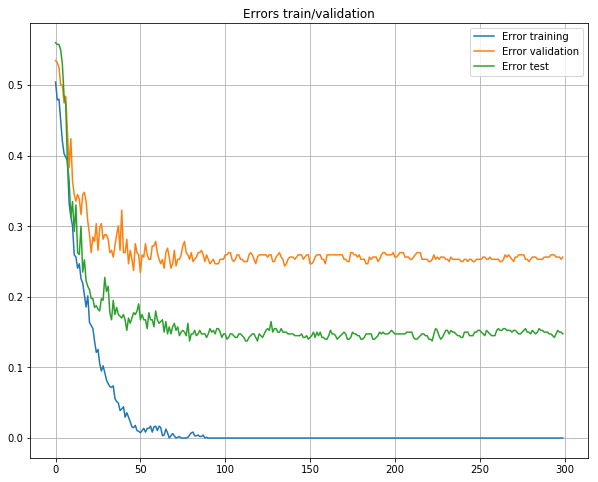

Performance train: 0.0
Performance validation: 0.25447257384
Performance test: 0.1493
47


  5%|▍         | 14/300 [00:00<00:02, 138.86it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 117.51it/s]


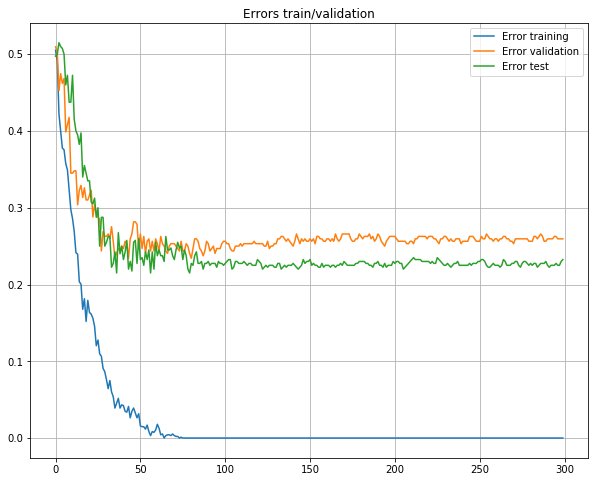

Performance train: 0.0
Performance validation: 0.259198312236
Performance test: 0.226866666667
48


  5%|▌         | 16/300 [00:00<00:01, 150.54it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:04<00:00, 68.50it/s]


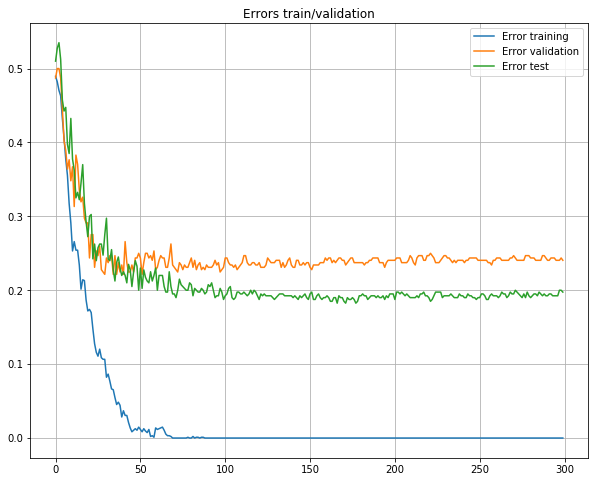

Performance train: 0.0
Performance validation: 0.241729957806
Performance test: 0.1933
49


  3%|▎         | 10/300 [00:00<00:03, 92.55it/s]

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)


100%|██████████| 300/300 [00:02<00:00, 113.36it/s]


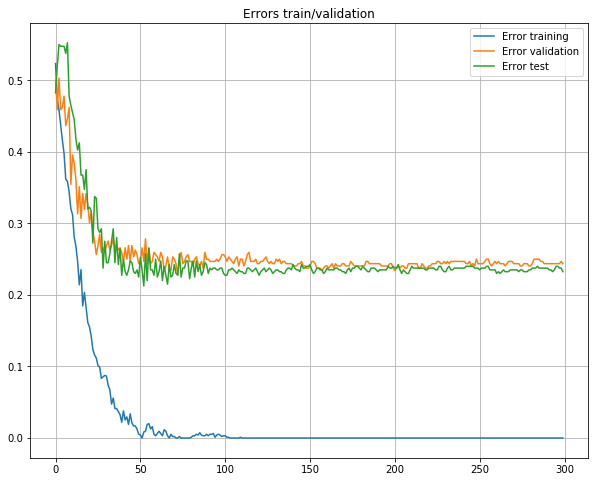

Performance train: 0.0
Performance validation: 0.244894514768
Performance test: 0.236133333333


In [17]:
results=[]
for i in range(50):
    print(i)
    train_dataset,train_target=load_script.load_dataset(train=True)
    test_dataset,test_target=load_script.load_dataset(train=False)
    
    dataset=torch.cat((train_dataset.data,test_dataset.data),0)
    target=torch.cat((train_target.data,test_target.data),0)
    permutations=torch.randperm(dataset.shape[0])
    dataset=dataset[permutations]
    target=target[permutations]
    train_dataset=Variable(dataset[:316])
    train_target=Variable(target[:316])
    test_dataset=Variable(dataset[316:])
    test_target=Variable(target[316:])
    mean=train_dataset.mean(0).mean(1).view(1,28,1)
    std=train_dataset.std(2).mean(0).view(1,28,1)
    train_dataset=(train_dataset-mean)/std
    test_dataset=(test_dataset-mean)/std
    
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)

    net_type=SingleCNNLayer
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=0,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [18]:
params.network

SingleCNNLayer(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Flatten(
    )
    (5): Linear(in_features=1344, out_features=200, bias=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=2, bias=True)
  )
)

In [19]:
validation=[]
test=[]
for result in results:
    for experiment in result._experiments:
        validation.append(experiment._performance_validation)
        test.append(experiment._performance_test)

In [20]:
np.mean(validation)

0.23507932489451475

In [21]:
np.mean(test)

0.21368866666666667

In [22]:
save=True
if save:
    file_name=folder.stored+'shuffle'
    write_pickle(results,file_name)

In [58]:
validation=[]
test=[]
for result in results[2:3]:
    for experiment in result._experiments:
        for fold in experiment._kfolds:
            
            validation.append(fold._errors_validation)
        for train in experiment._train_test:
            test.append(train._errors_validation)

In [59]:
val=np.mean(np.vstack(validation),0)
tes=np.mean(np.vstack(test),0)

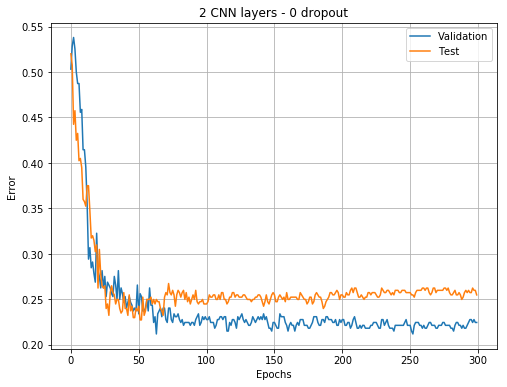

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range(300),val,label='Validation')
plt.plot(range(300),tes,label='Test')
plt.legend()
plt.grid()
plt.title('2 CNN layers - 0 dropout')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)